# Solving LinkedIn Queens with Linear Optimization

Queens is a daily game available on LinkedIn as part of the platform's strategy to increase user engagement. Personally, I found it a really cool game for testing logical reasoning and problem-solving (it even made me rack my brain over some of the problems). Based on the game's rules, I realized it could be easily solved using Linear Programming, which turned out to be a great opportunity to apply what I learned in Operations Research courses during my university years. For this, I used Pyomo, a Python library geared towards mathematical modeling.

# Linear Optimization

**Linear Optimization** (LO) is an area of Applied Mathematics that deals with deterministic optimization problems. For a model to represent a **Linear Optimization Problem** (LOP), its objective function and constraints must be linear formulas, that is, written as a sum of products between constants and variables, as in the following example.

$$a_1 x_1 + a_2 x_2 + \cdots + a_n x_n$$

Therefore, if the objective function is not linear or the problem presents at least one non-linear constraint, then it would already be a **Non-Linear Linear Optimization Problem** (NLOP) and we would need **Non-Linear Programming** (NLO) techniques to solve it (which fortunately is not the case for Queens 🙂).

Because the objective function and the model constraints are linear expressions, an <abbr title="Linear Optimization Problem">LOP</abbr> implicitly assumes at least four hypotheses in its modeling:

- **Proportionality**: The contribution of each decision variable to the objective function and to the model constraints must be directly proportional to its value. Situations that take into account economies of scale, initial manufacturing setup costs, etc., are examples where this principle is violated.
- **Additivity**: The contribution of each decision variable to the objective function and to the model constraints is independent of the values of the other decision variables. For example, the objective function $z(x,y)=2x+3y$ shows that the contribution $2x$ that the variable $x$ provides to $z$ is independent of the contribution $3y$ that the variable $y$ provides to $z$, satisfying the additivity assumption. However, $z(x,y)=2x+3y-xy$, for example, violates it, since the contribution of $x$ to $z$ is no longer $2x$, but rather $2x-xy$, which depends on the value of $y$.
- **Divisibility and non-negativity**: Each of the decision variables can take any values within the set of positive real numbers, as long as they satisfy the model's constraints. In the case of Queens, as will be seen later, the variables will be of the binary type, which makes our <abbr title="Linear Optimization Problem">LOP</abbr> a **Binary Linear Optimization Problem** (BLOP).
- **Certainty**: The coefficients and independent terms of the objective function and the model's constraints are deterministic, that is, if it is modeled that $z(x,y)=2x+3y$, it would be assumed that the coefficients $2$ and $3$ of $x$ and $y$, respectively, would be known and certain, that is, it would be certain that the contribution of $x$ to $z$ would always be 2 times the amount of $x$, while the contribution of $y$ to $z$ would always be 3 times the amount of $y$, no matter what the values of $x$ and $y$ are. In the <abbr title="Binary Linear Optimization Problem">BLOP</abbr> model for the Queens game, all coefficients and independent terms will be equal to 1 (except for the arbitrary constant $C$, which can take any value, as will be seen later).

# How to Play Queens

<figure style="text-align:center;">
    <figcaption>Example of a Queens minigame board</figcaption>
    <img src="https://cdn.jsdelivr.net/gh/rodrigo-cl-porto/Solving-LinkedIn-Minigames-with-Linear-Optimization/assets/queens_example.png" style="width:30%;">
    <figcaption>Source: LinkedIn</figcaption>
</figure>

**Objective**

- To place a crown in each row, column, and colored region on the board.

**Rules**

- There can only be one crown in each row, column, and colored region;
- There cannot be adjacent crowns, not even along adjacent diagonals.

# Problem Modeling

Before solving Queens, it is necessary to translate the game elements into the following components of the <abbr title="Linear Optimization Problem">LOP</abbr>:

- **Ranges**
- **Sets**
- **Decision Variables**
- **Objective Function**
- **Constraints**

## Ranges

Defining the ranges is a fundamental step for the proper definition of the other components of the <abbr title="Linear Optimization Problem">LOP</abbr>. For the case of Queens, three ranges will be considered:

- $I = \{1, \cdots, n\}$, representing the range of rows, where $n$ is the total number of rows on the board (in this case, $n = 7$);
- $J = \{1, \cdots, m\}$, representing the range of columns, where $m$ is the total number of columns on the board ($m = 7$);
- $K = \{1, \cdots, p\}$, representing the range of colored regions in game, where $p$ is the total number of regions on the board ($p = 7$);

## Sets

By defining the ranges $I$ and $J$, let's define two essential sets for solving the Queens game:

- $H = \{(i,j) \mid \forall i \in I, \forall j \in J\} = I \times J$, is the set of all squares $(i, j)$ on the board, which is nothing more than the Cartesian product of the intervals $I$ and $J$.
- $R = \{((i,j),k) \mid (i,j) \in H, k \in K\}$, which represents the set of colored regions and says to which region $k$ a house $(i,j)$ belongs. Each region $k$ will be a subset of $R$, composed of the set of ordered pairs $(i,j)$ that belong to color $k$. Furthermore, the set $R_k$ must be a partition of the set of squares $H$, that is, the union of all its subsets $R_k$ are jointly exhaustive and mutually exclusive, since each square belongs to one color and there is no square that belongs to two different colors.

In addition to it, we'll also define a set of all pairs of diagonally adjacent houses in order to make defining the constraints easier later on.

- $D = \begin{array}{cr}
    \{((i,j), (i+1,j+1)) \mid (i,j), (i+1,j+1) \in H\}  & \cup \\
    \{((i,j), (i+1,j-1)) \mid (i,j), (i+1,j-1) \in H\}  &
\end{array}$

## Decision Variables

The decision variables, whose solution we want to find to solve the <abbr title="Linear Optimization Problem">LOP</abbr>, will be binary variables $x_{ij}$, which assume only two values:

- $x_{ij} = 1$, if the crown is located in row $i$ and column $j$;
- $x_{ij} = 0$, otherwise.

## Objective Function

The interesting thing about the Queens game is that, since we don't have an objective function to maximize or minimize, we are not actually dealing with an optimization problem, but rather a **feasibility problem**, that is, our objective is only to find a **feasible solution** that meets all the game's constraints. Because of this, we can define the objective function as maximizing (or minimizing, it doesn't matter) an arbitrary constant. Thus, the objective function will not depend on the decision variables, so that the model does not seek to optimize it and only worries about meeting the constraints.

$$\text{Max} \ C$$

## Constraints

With the previous elements well defined, we can finally translate Queens' rules into constraints for our <abbr title="Binary Linear Optimization Problem">BLOP</abbr> model. Let's go step by step:

- **Binarity Constraints** - The first constraint we need to define right away is that all decision variables in our problem are binary variables, meaning they only accept 0 and 1 as valid values.

$$x_{ij} \in \{0,1\}, \forall i \in I, \forall j \in J$$

- **Single-Crown-Per-Row Constraints** - Since each row on the board must have only one crown, the sum of all $x_{ij}$ belonging to a row $i$ must equal 1. As there are 7 rows in total, there will be 7 such constraints, one for each row.

$$\sum_{j = 1}^{m}{x_{ij}} = 1, \forall i \in I$$

- **Single-Crown-Per-Column Constraints** - The same logic applies to the columns. Since there are 7 columns on the board, there will be 7 more constraints, one for each column.

$$\sum_{i = 1}^{n}{x_{ij}} = 1, \forall j \in J$$

- **Single-Crown-Per-Region Constraints** - The same logic also applies to the colored regions. For each region of the board, the sum of the $x_{ij}$ belonging to a region $k$ must be equal to 1. Since there are 7 regions, there will be 7 more constraints.

$$\sum_{(i,j) \in R_k}{x_{ij}} = 1, \forall k \in K$$

- **Diagonally-Adjacent-Houses Constraints** - Finally, we must not forget the rule that there cannot be adjacent crowns, not even along the diagonals. The cases of vertical and horizontal proximity do not need to be addressed, since the row and column constraints already cover this. Therefore, we only need to worry about imposing constraints for the two diagonal directions in each pair of shared-vertex squares. With the set $D$ well defined, this constraint is easily defined as it follows.

$$x_{ij} + x_{rs} \le 1, \forall ((i,j), (r,s)) \in D$$

# Abstract Model

With all components defined, it is possible to model the game of Queens using the following abstract model.

$$
\begin{array}{lll}
    & \text{Max } C \\
    \text{S.t.:} & \\
    & \sum_{j=1}^{m}{x_{ij}} = 1, & \forall i \in I \\
    & \sum_{i=1}^{n}{x_{ij}} = 1, & \forall j \in J \\
    & \sum_{(i,j) \in R_k}{x_{ij}} = 1, & \forall k \in K \\
    & x_{ij} + x_{rs} \le 1, & \forall ((i,j),(r,s)) \in D \\
    & x_{ij} \in \{0,1\}, & \forall (i,j) \in H
\end{array}
$$

# Concrete Model

For the Queens game, which will be discussed in this article, we will have the following instance of the abstract model presented earlier, that is, its concrete model.

**Objective function**

- $\text{Max} \ 0$

**Subject to**:

(_Single-Crown-Per-Row Constraints_)

- $x_{11} + x_{12} + x_{13} + x_{14} + x_{15} + x_{16} + x_{17} = 1$ (_Row 1_)
- $x_{21} + x_{22} + x_{23} + x_{24} + x_{25} + x_{26} + x_{27} = 1$ (_Row 2_)
- $x_{31} + x_{32} + x_{33} + x_{34} + x_{35} + x_{36} + x_{37} = 1$ (_Row 3_)
- $x_{41} + x_{42} + x_{43} + x_{44} + x_{45} + x_{46} + x_{47} = 1$ (_Row 4_)
- $x_{51} + x_{52} + x_{53} + x_{54} + x_{55} + x_{56} + x_{57} = 1$ (_Row 5_)
- $x_{61} + x_{62} + x_{63} + x_{64} + x_{65} + x_{66} + x_{67} = 1$ (_Row 6_)
- $x_{71} + x_{72} + x_{73} + x_{74} + x_{75} + x_{76} + x_{77} = 1$ (_Row 7_)

(_Single-Crown-Per-Column Constraints_)

- $x_{11} + x_{21} + x_{31} + x_{41} + x_{51} + x_{61} + x_{71} = 1$ (_Column 1_)
- $x_{12} + x_{22} + x_{32} + x_{42} + x_{52} + x_{62} + x_{72} = 1$ (_Column 2_)
- $x_{13} + x_{23} + x_{33} + x_{43} + x_{53} + x_{63} + x_{73} = 1$ (_Column 3_)
- $x_{14} + x_{24} + x_{34} + x_{44} + x_{54} + x_{64} + x_{74} = 1$ (_Column 4_)
- $x_{15} + x_{25} + x_{35} + x_{45} + x_{55} + x_{65} + x_{75} = 1$ (_Column 5_)
- $x_{16} + x_{26} + x_{36} + x_{46} + x_{56} + x_{66} + x_{76} = 1$ (_Column 6_)
- $x_{17} + x_{27} + x_{37} + x_{47} + x_{57} + x_{67} + x_{77} = 1$ (_Column 7_)

(_Single-Crown-Per-Region Constraints_)

- $x_{11} + x_{12} + x_{13} + x_{14} + x_{15} + x_{16} + x_{17} + x_{26} + x_{27} + x_{36} + x_{37} + x_{46} + x_{47} + x_{57} + x_{67} + x_{77} = 1$ (_<span style="color:#BDA3DF">Purple Region</span>_)
- $x_{12} + x_{22} + x_{32} + x_{42} + x_{33} + x_{41} + x_{42} + x_{51} + x_{52} + x_{16} + x_{26} + x_{46} + x_{56} + x_{66} + x_{71} + x_{72} + x_{73} + x_{74} + x_{75} + x_{76} = 1$ (_<span style="color:#FECB96">Orange Region</span>_)
- $x_{25} + x_{35} = 1$ (_<span style="color:#99BBFC">Blue Region</span>_)
- $x_{32} + x_{33} = 1$ (_<span style="color:#B1DFA1">Green Region</span>_)
- $x_{34} + x_{43} + x_{44} + x_{45} + x_{54} = 1$ (_<span style="color:#E0E0E0">Gray Region</span>_)
- $x_{53} + x_{63} = 1$ (_<span style="color:#FE8066">Red Region</span>_)
- $x_{55} + x_{56} = 1$ (_<span style="color:#E4F48F">Yellow Region</span>_)

(_Principal Diagonals Constraints_)

- $x_{11} + x_{22} \le 1$
- $x_{12} + x_{23} \le 1$
- $x_{13} + x_{24} \le 1$
- $x_{14} + x_{25} \le 1$
- $x_{15} + x_{26} \le 1$
- $x_{21} + x_{32} \le 1$
- $x_{22} + x_{33} \le 1$
- $x_{23} + x_{34} \le 1$
- $x_{24} + x_{35} \le 1$
- $x_{25} + x_{36} \le 1$
- $x_{31} + x_{42} \le 1$
- $x_{32} + x_{43} \le 1$
- $x_{33} + x_{44} \le 1$
- $x_{34} + x_{45} \le 1$
- $x_{35} + x_{46} \le 1$
- $x_{41} + x_{52} \le 1$
- $x_{42} + x_{53} \le 1$
- $x_{43} + x_{54} \le 1$
- $x_{44} + x_{55} \le 1$
- $x_{45} + x_{56} \le 1$
- $x_{51} + x_{62} \le 1$
- $x_{52} + x_{63} \le 1$
- $x_{53} + x_{64} \le 1$
- $x_{54} + x_{65} \le 1$
- $x_{55} + x_{66} \le 1$

(_Secondary Diagonals Constraints_)

- $x_{12} + x_{21} \le 1$
- $x_{13} + x_{22} \le 1$
- $x_{14} + x_{23} \le 1$
- $x_{15} + x_{24} \le 1$
- $x_{16} + x_{25} \le 1$
- $x_{22} + x_{31} \le 1$
- $x_{23} + x_{32} \le 1$
- $x_{24} + x_{33} \le 1$
- $x_{25} + x_{34} \le 1$
- $x_{26} + x_{35} \le 1$
- $x_{32} + x_{41} \le 1$
- $x_{33} + x_{42} \le 1$
- $x_{34} + x_{43} \le 1$
- $x_{35} + x_{44} \le 1$
- $x_{36} + x_{45} \le 1$
- $x_{42} + x_{51} \le 1$
- $x_{43} + x_{52} \le 1$
- $x_{44} + x_{53} \le 1$
- $x_{45} + x_{54} \le 1$
- $x_{46} + x_{55} \le 1$
- $x_{52} + x_{61} \le 1$
- $x_{53} + x_{62} \le 1$
- $x_{54} + x_{63} \le 1$
- $x_{55} + x_{64} \le 1$
- $x_{56} + x_{65} \le 1$

(_Binarity Constraints_)

- $x_{12} \in \{0,1\}$
- $x_{13} \in \{0,1\}$
- $x_{14} \in \{0,1\}$
- $x_{15} \in \{0,1\}$
- $x_{16} \in \{0,1\}$
- $x_{17} \in \{0,1\}$
- $x_{21} \in \{0,1\}$
- $x_{22} \in \{0,1\}$
- $x_{23} \in \{0,1\}$
- $x_{24} \in \{0,1\}$
- $x_{25} \in \{0,1\}$
- $x_{26} \in \{0,1\}$
- $x_{27} \in \{0,1\}$
- $x_{31} \in \{0,1\}$
- $x_{32} \in \{0,1\}$
- $x_{33} \in \{0,1\}$
- $x_{34} \in \{0,1\}$
- $x_{35} \in \{0,1\}$
- $x_{36} \in \{0,1\}$
- $x_{37} \in \{0,1\}$
- $x_{41} \in \{0,1\}$
- $x_{42} \in \{0,1\}$
- $x_{43} \in \{0,1\}$
- $x_{44} \in \{0,1\}$
- $x_{45} \in \{0,1\}$
- $x_{46} \in \{0,1\}$
- $x_{47} \in \{0,1\}$
- $x_{51} \in \{0,1\}$
- $x_{52} \in \{0,1\}$
- $x_{53} \in \{0,1\}$
- $x_{54} \in \{0,1\}$
- $x_{55} \in \{0,1\}$
- $x_{56} \in \{0,1\}$
- $x_{57} \in \{0,1\}$
- $x_{61} \in \{0,1\}$
- $x_{62} \in \{0,1\}$
- $x_{63} \in \{0,1\}$
- $x_{64} \in \{0,1\}$
- $x_{65} \in \{0,1\}$
- $x_{66} \in \{0,1\}$
- $x_{67} \in \{0,1\}$
- $x_{71} \in \{0,1\}$
- $x_{72} \in \{0,1\}$
- $x_{73} \in \{0,1\}$
- $x_{74} \in \{0,1\}$
- $x_{75} \in \{0,1\}$
- $x_{76} \in \{0,1\}$
- $x_{77} \in \{0,1\}$

# Solving with Pyomo and NetworkX

[**Pyomo**](https://www.pyomo.org/) is an open-source library for modeling optimization problems. Its main advantage is the ability to model problems using set logic, which allows defining a set of variables, parameters, and constraints from the definition of other sets of objects. For example, once one defines the set of ranges $I$, $J$, and $K$, it's possible to define, e.g., the set of houses, regions and diagonals with just one line of code each instead of defining them one by one, saving considerable time!

The [**NetworkX**](https://networkx.org/) library, in turn, is geared towards manipulating and studying network structures. With it, it's possible to create graphs and solve problems modeled in network logic quickly and easily, such as the Shortest Path problem, Minimum Spanning Tree, Transportation and Transshipment problem, and other graph problems. Furthermore, it's possible to quickly draw graphs when combined with Matplotlib.

## Solver Installation

Since **Pyomo is not a solver**, but rather a modeling library, in addition to importing it, it's also necessary to install a solver within the environment. The solver used was [Gurobi Optimizer](https://www.gurobi.com/lp/or/gurobi-optimizer/), a commercial optimization software capable of solving both Linear and Non-Linear Optimization Problems. To install it, simply run the following command in the terminal.

In [ ]:
%pip install gurobipy

After installing the solver, let's import the used libraries.

In [23]:
import matplotlib.pyplot as plt # For displaying the solved game.
import networkx as nx
import pyomo.environ as pyo

## Solving Queens

As an example of applying the presented model, the Queens No. 307 problem, published on the platform on March 3rd, 2025, was used.

<figure style="text-align:center;">
    <figcaption>Queens No. 307 (March 3rd, 202)</figcaption>
    <img src="https://cdn.jsdelivr.net/gh/rodrigo-cl-porto/Solving-LinkedIn-Minigames-with-Linear-Optimization/assets/queens_example.png" style="width:30%;">
    <figcaption>Source: LinkedIn</figcaption>
</figure>

In order to model and solve the game, it was defined the `solve_queen()` function in the code below.

A noteful detail: although it's been mentioned that $K$ is an range, in `solve_queens()` it's created as a `Set` because its indices are not numeric but rather the names of the colored regions.

In [76]:
def solve_queens(n:int, m:int, regions:dict) -> None:

    # Instantiating the model
    model = pyo.ConcreteModel()

    # Ranges
    I = model.I = pyo.RangeSet(n)
    J = model.J = pyo.RangeSet(m)
    K = model.Colors = pyo.Set(initialize=regions.keys())

    # Sets
    H = model.Houses = pyo.Set(initialize=lambda model: [(i, j) for i in I for j in J])
    R = model.Regions = pyo.Set(K, initialize=regions, dimen=2)
    D = model.Diagonals = pyo.Set(initialize=lambda model: [
        ((i, j), (i+1, j+1)) for (i,j) in H if (i+1,j+1) in H] + [
        ((i, j), (i+1, j-1)) for (i,j) in H if (i+1,j-1) in H
    ])

    # Objective function
    model.obj = pyo.Objective(expr=0, sense=pyo.maximize)

    # Decision Variables
    x = model.x = pyo.Var(H, within=pyo.Binary, initialize=0)

    # Constraints
    model.single_crown_per_row_constraints = pyo.Constraint(
        I,
        rule=lambda model, i: sum(x[i,j] for j in J) == 1
    )

    model.single_crown_per_column_constraints = pyo.Constraint(
        J,
        rule=lambda model, j: sum(x[i,j] for i in I) == 1
    )

    model.single_crown_per_region_constraints = pyo.Constraint(
        K,
        rule=lambda model, k: sum(x[i,j] for (i,j) in R[k]) == 1
    )

    model.adjacent_houses_by_vertex_constraints = pyo.Constraint(
        D,
        rule=lambda model, i, j, r, s: x[i,j] + x[r,s] <= 1
    )

    # Optmization result
    solver = pyo.SolverFactory('gurobi')
    results = solver.solve(model)
    solution = [(i, j) for i in I for j in J if model.x[i,j].value == 1]

    if str(results.Solver.status) == 'ok':
        G = nx.grid_2d_graph(n,m)

        houses = sorted(list(H))
        houses = [(i-1, j-1) for (i,j) in houses]

        color_map = [{(i-1, j-1): region for (i,j) in houses} for region, houses in regions.items()]
        color_map = {house: region for d in color_map for house, region in d.items()}
        color_map = [color_map[house] for house in houses]

        nx.draw(
            G,
            pos= {(i,j): (j, -i) for i, j in G.nodes()},
            with_labels= True,
            labels= {(i-1, j-1): 'O' for (i,j) in solution},
            node_size= 800,
            node_color= color_map,
            node_shape='s',
            width=0
        )
        plt.show()
    else:
        print('No valid solution was found!')

With the function created, it's only needed to pass the necessary inputs to solve the Queens game.

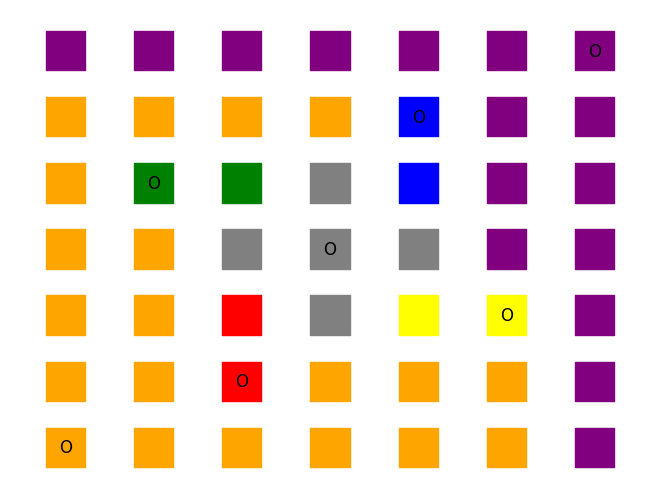

In [77]:
regions = {
    'purple': [(1,1), (1,2), (1,3), (1,4), (1,5), (1,6), (1,7), (2,6), (2,7), (3,6), (3,7), (4,6), (4,7), (5,7), (6,7), (7,7)],
    'orange': [(2,1), (2,2), (2,3), (2,4), (3,1), (4,1), (4,2), (5,1), (5,2), (6,1), (6,2), (6,4), (6,5), (6,6), (7,1), (7,2), (7,3), (7,4), (7,5), (7,6)],
    'blue': [(2,5), (3,5)],
    'green': [(3,2), (3,3)],
    'gray': [(3,4), (4,3), (4,4), (4,5), (5,4)],
    'red': [(5,3), (6,3)],
    'yellow': [(5,5), (5,6)]
}

solve_queens(7,7,regions)

The output board matches the solution of the Queens No. 307, as expected.

<figure style="text-align:center;">
    <figcaption>Queens No. 307 (March 3rd, 202)</figcaption>
    <img src="https://cdn.jsdelivr.net/gh/rodrigo-cl-porto/Solving-LinkedIn-Minigames-with-Linear-Optimization/assets/queens_solution.png" style="width:30%;">
    <figcaption>Source: LinkedIn</figcaption>
</figure>

# References

- **Queens**. LinkedIn. Available at https://www.linkedin.com/games/queens/. Accessed on Marh 3rd, 2025.
- BELFIORE, Patrícia; FÁVERO, Luiz Paulo. **Pesquisa Operacional**: Para cursos de Administração, Contabilidade e Economia. Elsevier Editora Ltda., 2012.
- **Pyomo**. Available at https://www.pyomo.org/. Accessed on Marh 3rd, 2025.
- **Gurobipy**. Gurobi Optimization. Available at https://www.gurobi.com/faqs/gurobipy/. Accessed on Marh 3rd, 2025.
- **gurobipy 12.0.3**. PyPI. July 15th, 2025. Available at https://pypi.org/project/gurobipy/. Accessed on Marh 3rd, 2025.
- **NetworkX**. Available at https://networkx.org/. Accessed on Marh 3rd, 2025.